# **PART I:** Sentiment analysis using LSTM [40 pts]

In this part, we perform a sentiment analysis using LSTM model. **NOTE:** The expected accuracy for this part is more than 75% for the final model.

#### QUESTION 0
Which dataset do you choose? Briefly justify your choice (e.g., relevance to your field of study or general interest).

We have used "Twitter US Airline Sentiment" from Kaggle. Sentiment analysis is a high in demand branch of NLP and we have chosen this dataset to understand and explore this field of DL by using LSTM and optimised LSTM. This dataset analyze how travelers in February 2015 expressed their feelings regarding their airline travel on Twitter.

## **TASK 1:** Data Exploration & Preprocessing

### **STEP 1:** Main Statistics

Read, preprocess, and print the main statistics about the dataset.

In [1]:
import pandas as pd

# Read the dataset
df = pd.read_csv('/content/sample_data/Tweets.csv')

# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

# Print statistics
print("\nDataset Statistics:")
print("Number of records:", len(df))
print("Number of airlines:", df['airline'].nunique())
print("Sentiment distribution:\n", df['airline_sentiment'].value_counts())


First 5 rows of the dataset:
             tweet_id airline_sentiment  airline_sentiment_confidence  \
0  570306133677760513           neutral                        1.0000   
1  570301130888122368          positive                        0.3486   
2  570301083672813571           neutral                        0.6837   
3  570301031407624196          negative                        1.0000   
4  570300817074462722          negative                        1.0000   

  negativereason  negativereason_confidence         airline  \
0            NaN                        NaN  Virgin America   
1            NaN                     0.0000  Virgin America   
2            NaN                        NaN  Virgin America   
3     Bad Flight                     0.7033  Virgin America   
4     Can't Tell                     1.0000  Virgin America   

  airline_sentiment_gold        name negativereason_gold  retweet_count  \
0                    NaN     cairdin                 NaN              0   
1  

#### QUESTION 1
Provide brief details about the nature of your dataset:

- 1.1 What is it about?

 This dataset analyze how travelers in February 2015 expressed their feelings regarding their airline travel on Twitter.

- 1.2 What type of data are we encountering?

The dataset classifies the passenger's travel experience as positive, negative, and neutral based on their tweets,and these are stored in the .csv format scraped from 2015 contributors.

- 1.3 How many entries and variables does the dataset comprise?

Dataset Statistics:
Number of records: 14640
Number of airlines: 6
Sentiment distribution:
 airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

### **STEP 2:** Data Visualization

Using any data visualization library (e.g. [matplotlib](https://matplotlib.org/stable/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py), [seaborn](https://seaborn.pydata.org/), [plotly](https://plotly.com/python/)), provide at least 3 visualization graphs related to your dataset.

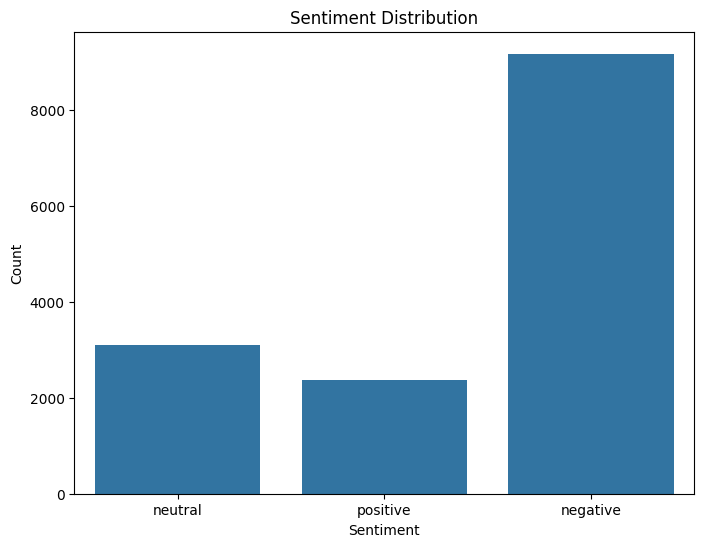

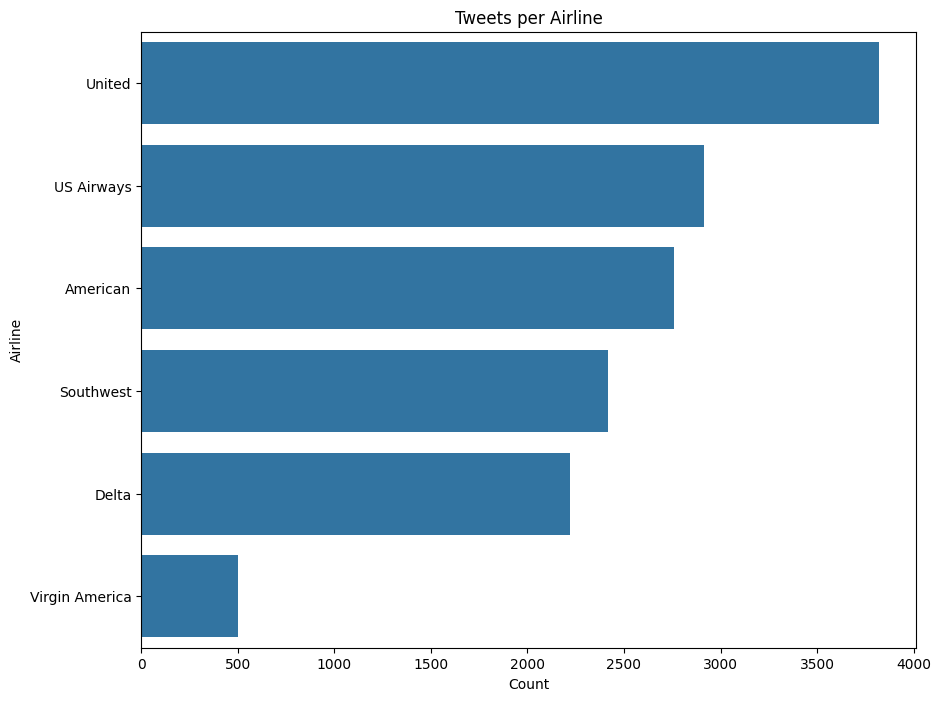

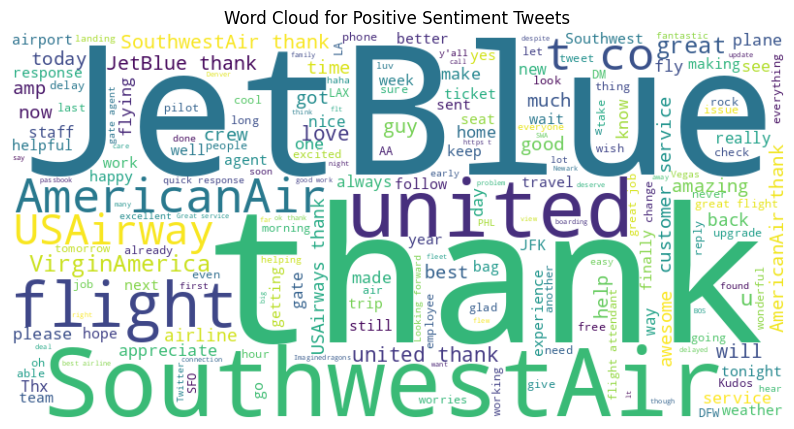

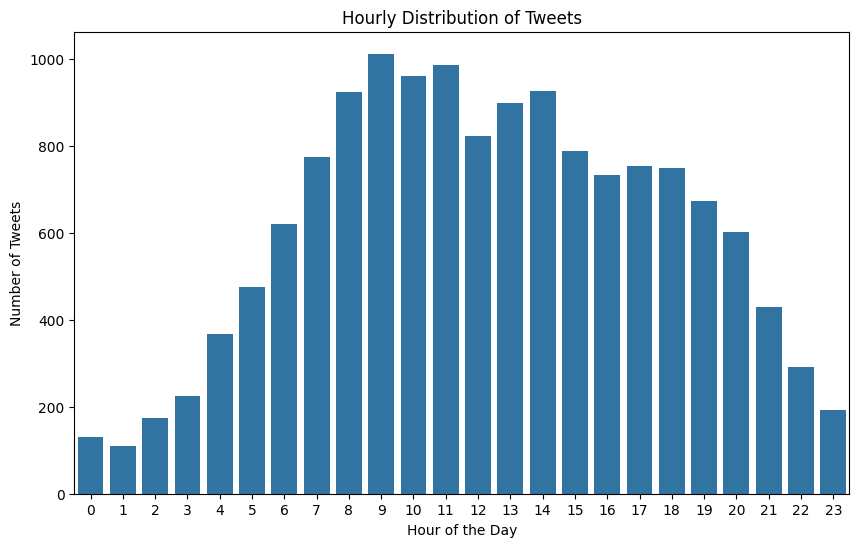

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Sentiment distribution
plt.figure(figsize=(8,6))
sns.countplot(x='airline_sentiment', data=df)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Tweets per airline
plt.figure(figsize=(10,8))
sns.countplot(y='airline', data=df, order=df['airline'].value_counts().index)
plt.title('Tweets per Airline')
plt.xlabel('Count')
plt.ylabel('Airline')
plt.show()

# Word cloud of positive sentiment tweets
positive_tweets = ' '.join(df[df['airline_sentiment'] == 'positive']['text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_tweets)

plt.figure(figsize=(10,8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Sentiment Tweets')
plt.axis('off')
plt.show()

# Convert 'tweet_created' to datetime
df['tweet_created'] = pd.to_datetime(df['tweet_created'])

# Extract hour from 'tweet_created'
df['hour'] = df['tweet_created'].dt.hour

plt.figure(figsize=(10,6))
sns.countplot(x='hour', data=df)
plt.title('Hourly Distribution of Tweets')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.show()



# STEP 3: Prepare the Datasets

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Encode labels
le = LabelEncoder()
df['sentiment_encoded'] = le.fit_transform(df['airline_sentiment'])

# Tokenize the text
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(df['text'])
sequences = tokenizer.texts_to_sequences(df['text'])
word_index = tokenizer.word_index

# Pad sequences
data = pad_sequences(sequences, maxlen=100)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(data, df['sentiment_encoded'], test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("\nData Preparation:")
print(f"Training set: {len(X_train)} samples")
print(f"Validation set: {len(X_val)} samples")
print(f"Test set: {len(X_test)} samples")



Data Preparation:
Training set: 9369 samples
Validation set: 2343 samples
Test set: 2928 samples


## **TASK 2:** Build a LSTM Model

#### EXPERIMENT #1

#### EXPERIMENT #1
Epoch=5
Batch size=64
Dropout=0.01
Patience=2

In [23]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the LSTM model with additional dropout layers and batch normalization
model1_lstm = Sequential()
model1_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model1_lstm.add(LSTM(128, return_sequences=True))
model1_lstm.add(BatchNormalization())
model1_lstm.add(Dropout(0.01))
model1_lstm.add(LSTM(64))
model1_lstm.add(BatchNormalization())
model1_lstm.add(Dropout(0.01))
model1_lstm.add(Dense(3, activation='softmax'))

model1_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with reduced patience for early stopping
checkpoint_lstm = ModelCheckpoint('model1_lstm.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Train the model
history_lstm = model1_lstm.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint_lstm, early_stopping_lstm])


Epoch 1/5
147/147 [==============================] - ETA: 0s - loss: 0.7313 - accuracy: 0.7143
Epoch 1: val_loss improved from inf to 0.90381, saving model to model1_lstm.h5
147/147 [==============================] - 16s 78ms/step - loss: 0.7313 - accuracy: 0.7143 - val_loss: 0.9038 - val_accuracy: 0.6428
Epoch 2/5
  1/147 [..............................] - ETA: 2s - loss: 0.4486 - accuracy: 0.8125

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


147/147 [==============================] - ETA: 0s - loss: 0.3502 - accuracy: 0.8701
Epoch 2: val_loss improved from 0.90381 to 0.87843, saving model to model1_lstm.h5
147/147 [==============================] - 5s 32ms/step - loss: 0.3502 - accuracy: 0.8701 - val_loss: 0.8784 - val_accuracy: 0.5860
Epoch 3/5
147/147 [==============================] - ETA: 0s - loss: 0.1999 - accuracy: 0.9301
Epoch 3: val_loss did not improve from 0.87843
147/147 [==============================] - 4s 25ms/step - loss: 0.1999 - accuracy: 0.9301 - val_loss: 1.0704 - val_accuracy: 0.5668
Epoch 4/5
147/147 [==============================] - ETA: 0s - loss: 0.1239 - accuracy: 0.9582
Epoch 4: val_loss improved from 0.87843 to 0.74087, saving model to model1_lstm.h5
147/147 [==============================] - 4s 25ms/step - loss: 0.1239 - accuracy: 0.9582 - val_loss: 0.7409 - val_accuracy: 0.7456
Epoch 5/5
147/147 [==============================] - ETA: 0s - loss: 0.0914 - accuracy: 0.9704
Epoch 5: val_loss did

In [24]:
# Evaluate LSTM model on the test set
model1_lstm.load_weights('model1_lstm.h5')
test_loss_lstm, test_accuracy_lstm = model1_lstm.evaluate(X_test, y_test)
print(f"\nLSTM Test Loss: {test_loss_lstm}")
print(f"LSTM Test Accuracy: {test_accuracy_lstm}")

92/92 [==============================] - 1s 8ms/step - loss: 0.7532 - accuracy: 0.7404

LSTM Test Loss: 0.7532137036323547
LSTM Test Accuracy: 0.7404371500015259


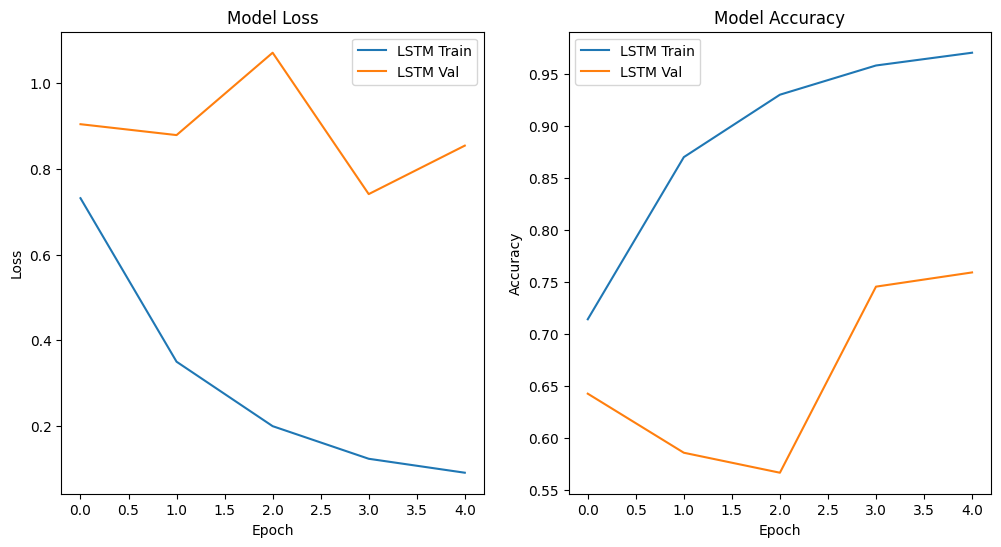

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val'], loc='upper left')

plt.show()


# Experiment 2
Epoch=4
Batch size=10
Dropout=0.1
Patience=4

In [19]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the LSTM model with additional dropout layers and batch normalization
model2_lstm = Sequential()
model2_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model2_lstm.add(LSTM(128, return_sequences=True))
model2_lstm.add(BatchNormalization())
model2_lstm.add(Dropout(0.1))
model2_lstm.add(LSTM(64))
model2_lstm.add(BatchNormalization())
model2_lstm.add(Dropout(0.1))
model2_lstm.add(Dense(3, activation='softmax'))

model2_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with reduced patience for early stopping
checkpoint_lstm = ModelCheckpoint('model2_lstm.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=4, verbose=1)

# Train the model
history_lstm = model2_lstm.fit(X_train, y_train, epochs=4, batch_size=10, validation_data=(X_val, y_val), callbacks=[checkpoint_lstm, early_stopping_lstm])


Epoch 1/4
937/937 [==============================] - ETA: 0s - loss: 0.7458 - accuracy: 0.7020
Epoch 1: val_loss improved from inf to 0.71563, saving model to model2_lstm.h5
937/937 [==============================] - 31s 27ms/step - loss: 0.7458 - accuracy: 0.7020 - val_loss: 0.7156 - val_accuracy: 0.7409
Epoch 2/4
935/937 [============================>.] - ETA: 0s - loss: 0.4544 - accuracy: 0.8304
Epoch 2: val_loss improved from 0.71563 to 0.68574, saving model to model2_lstm.h5
937/937 [==============================] - 17s 18ms/step - loss: 0.4541 - accuracy: 0.8305 - val_loss: 0.6857 - val_accuracy: 0.7507
Epoch 3/4
936/937 [============================>.] - ETA: 0s - loss: 0.3463 - accuracy: 0.8757
Epoch 3: val_loss improved from 0.68574 to 0.67627, saving model to model2_lstm.h5
937/937 [==============================] - 16s 17ms/step - loss: 0.3468 - accuracy: 0.8754 - val_loss: 0.6763 - val_accuracy: 0.7512
Epoch 4/4
934/937 [============================>.] - ETA: 0s - loss: 0.

In [20]:
# Evaluate LSTM model on the test set
model2_lstm.load_weights('model2_lstm.h5')
test_loss_lstm, test_accuracy_lstm = model2_lstm.evaluate(X_test, y_test)
print(f"\nLSTM Test Loss: {test_loss_lstm}")
print(f"LSTM Test Accuracy: {test_accuracy_lstm}")

92/92 [==============================] - 1s 10ms/step - loss: 0.6274 - accuracy: 0.7688

LSTM Test Loss: 0.6274080276489258
LSTM Test Accuracy: 0.7687841653823853


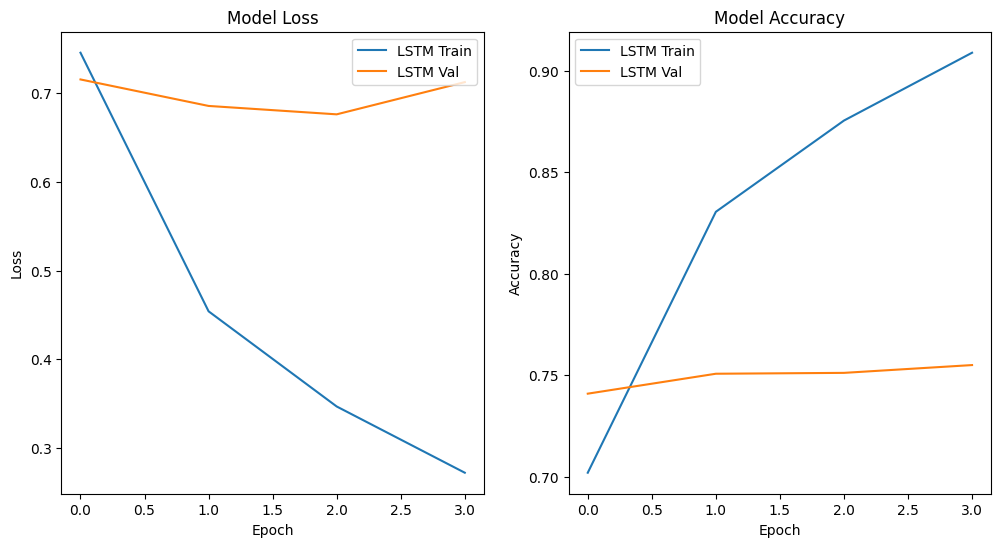

In [21]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val'], loc='upper left')

plt.show()


# Experiment 3
Epoch=10
Batch size=16
Dropout=0.3
Patience=2

In [10]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Define the LSTM model with additional dropout layers and batch normalization
model3_lstm = Sequential()
model3_lstm.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model3_lstm.add(LSTM(128, return_sequences=True))
model3_lstm.add(BatchNormalization())
model3_lstm.add(Dropout(0.3))
model3_lstm.add(LSTM(64))
model3_lstm.add(BatchNormalization())
model3_lstm.add(Dropout(0.3))
model3_lstm.add(Dense(3, activation='softmax'))
model3_lstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with reduced patience for early stopping
checkpoint_lstm = ModelCheckpoint('model3_lstm.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_lstm = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Train the model
history_lstm = model3_lstm.fit(X_train, y_train, epochs=10, batch_size=16, validation_data=(X_val, y_val), callbacks=[checkpoint_lstm, early_stopping_lstm])


Epoch 1/10
586/586 [==============================] - ETA: 0s - loss: 0.8135 - accuracy: 0.6780
Epoch 1: val_loss improved from inf to 0.63194, saving model to model3_lstm.h5
586/586 [==============================] - 24s 32ms/step - loss: 0.8135 - accuracy: 0.6780 - val_loss: 0.6319 - val_accuracy: 0.7490
Epoch 2/10
586/586 [==============================] - ETA: 0s - loss: 0.4678 - accuracy: 0.8246
Epoch 2: val_loss improved from 0.63194 to 0.57169, saving model to model3_lstm.h5
586/586 [==============================] - 13s 21ms/step - loss: 0.4678 - accuracy: 0.8246 - val_loss: 0.5717 - val_accuracy: 0.7751
Epoch 3/10
586/586 [==============================] - ETA: 0s - loss: 0.3259 - accuracy: 0.8869
Epoch 3: val_loss did not improve from 0.57169
586/586 [==============================] - 10s 17ms/step - loss: 0.3259 - accuracy: 0.8869 - val_loss: 0.8984 - val_accuracy: 0.7123
Epoch 4/10
586/586 [==============================] - ETA: 0s - loss: 0.2619 - accuracy: 0.9094
Epoch 4:

In [11]:
# Evaluate LSTM model on the test set
model3_lstm.load_weights('model3_lstm.h5')
test_loss_lstm, test_accuracy_lstm = model3_lstm.evaluate(X_test, y_test)
print(f"\nLSTM Test Loss: {test_loss_lstm}")
print(f"LSTM Test Accuracy: {test_accuracy_lstm}")

92/92 [==============================] - 1s 7ms/step - loss: 0.5460 - accuracy: 0.7824

LSTM Test Loss: 0.5459763407707214
LSTM Test Accuracy: 0.7824453711509705


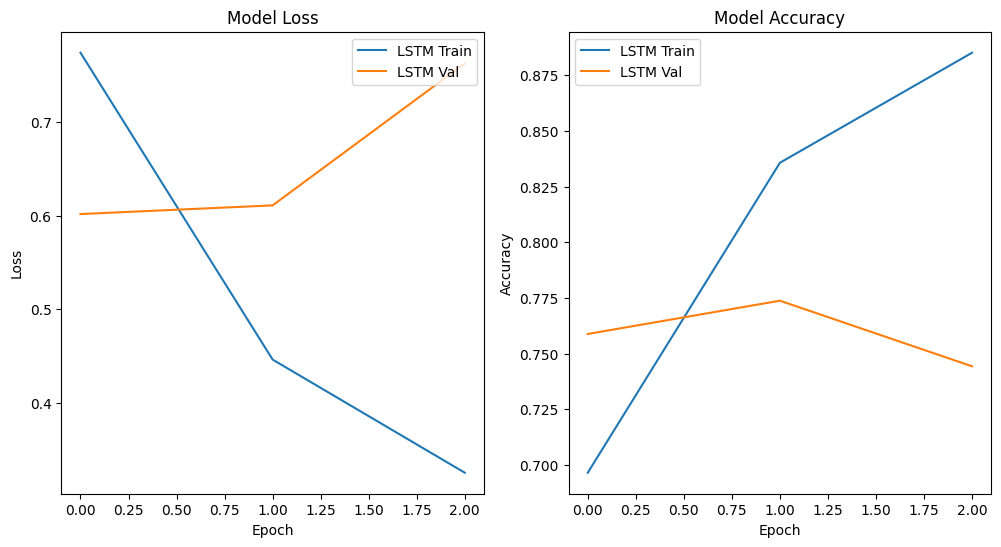

In [6]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_lstm.history['loss'])
plt.plot(history_lstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_lstm.history['accuracy'])
plt.plot(history_lstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LSTM Train', 'LSTM Val'], loc='upper left')

plt.show()


92/92 [==============================] - 1s 6ms/step


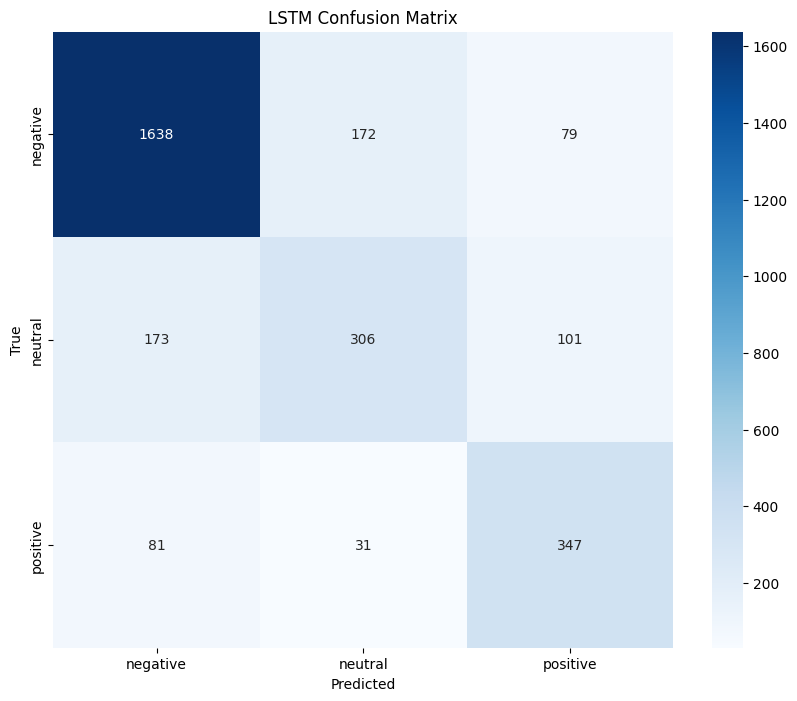


LSTM Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      1889
     neutral       0.60      0.53      0.56       580
    positive       0.66      0.76      0.70       459

    accuracy                           0.78      2928
   macro avg       0.71      0.72      0.71      2928
weighted avg       0.78      0.78      0.78      2928



In [22]:
# Confusion matrix for LSTM
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np

y_pred_lstm = np.argmax(model3_lstm.predict(X_test), axis=1)
conf_matrix_lstm = confusion_matrix(y_test, y_pred_lstm)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_lstm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('LSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nLSTM Classification Report:")
print(classification_report(y_test, y_pred_lstm, target_names=le.classes_))

#### QUESTION 2
Provide the details related to your LSTM architecture that returns the best result.

Input Dimension: 10,000 (vocabulary size)Output Dimension: 128 (embedding size)
Input Length: 100 (length of the input sequences)
First LSTM Layer:Units: 128
Batch Normalization:
Normalizes the outputs of the LSTM layer
Dropout:
Rate: 0.3 (30% dropout)
Second LSTM Layer:Units: 64
Batch Normalization:Normalizes the outputs of the second LSTM layer
Dropout:Rate: 0.3 (30% dropout)
Dense Layer:Units: 3
Activation: softmax


#### QUESTION 3
Analyze the graphs and results obtained during the training, validation, and test steps.

train loss: 0.2619
train accuracy: 0.9094
val_loss: 0.7176
val_accuracy: 0.7597
Test Loss: 0.546
Test Accuracy: 0.782


## **TASK 3:** Build an Improved LSTM Model

# EXPERIMENT #1
Epoch=4 Batch size=64 Dropout=0.4 Patience=5





In [26]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l2

# Define the BiLSTM model with additional dropout layers and batch normalization
model1_bilstm = Sequential()
model1_bilstm.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model1_bilstm.add(Bidirectional(LSTM(128, return_sequences=True)))
model1_bilstm.add(BatchNormalization())
model1_bilstm.add(Dropout(0.4))
model1_bilstm.add(Bidirectional(LSTM(64)))
model1_bilstm.add(BatchNormalization())
model1_bilstm.add(Dropout(0.4))
model1_bilstm.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.02)))

model1_bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with reduced patience for early stopping
checkpoint_bilstm = ModelCheckpoint('model1_bilstm.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=5, verbose=1)

# Train the model
history_bilstm = model1_bilstm.fit(X_train, y_train, epochs=4, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint_bilstm, early_stopping_bilstm])


Epoch 1/4
147/147 [==============================] - ETA: 0s - loss: 1.0349 - accuracy: 0.6325
Epoch 1: val_loss improved from inf to 0.96480, saving model to model1_bilstm.h5
147/147 [==============================] - 22s 89ms/step - loss: 1.0349 - accuracy: 0.6325 - val_loss: 0.9648 - val_accuracy: 0.7145
Epoch 2/4
147/147 [==============================] - ETA: 0s - loss: 0.5223 - accuracy: 0.8362
Epoch 2: val_loss improved from 0.96480 to 0.74780, saving model to model1_bilstm.h5
147/147 [==============================] - 6s 41ms/step - loss: 0.5223 - accuracy: 0.8362 - val_loss: 0.7478 - val_accuracy: 0.7256
Epoch 3/4
147/147 [==============================] - ETA: 0s - loss: 0.3420 - accuracy: 0.8971
Epoch 3: val_loss did not improve from 0.74780
147/147 [==============================] - 6s 39ms/step - loss: 0.3420 - accuracy: 0.8971 - val_loss: 1.0849 - val_accuracy: 0.6406
Epoch 4/4
147/147 [==============================] - ETA: 0s - loss: 0.2410 - accuracy: 0.9308
Epoch 4: v

In [27]:
# Evaluate BiLSTM model on the test set
model1_bilstm.load_weights('model1_bilstm.h5')
test_loss_bilstm, test_accuracy_bilstm = model1_bilstm.evaluate(X_test, y_test)
print(f"\nBiLSTM Test Loss: {test_loss_bilstm}")
print(f"BiLSTM Test Accuracy: {test_accuracy_bilstm}")

92/92 [==============================] - 1s 11ms/step - loss: 0.7346 - accuracy: 0.7261

BiLSTM Test Loss: 0.7346177101135254
BiLSTM Test Accuracy: 0.7260928750038147


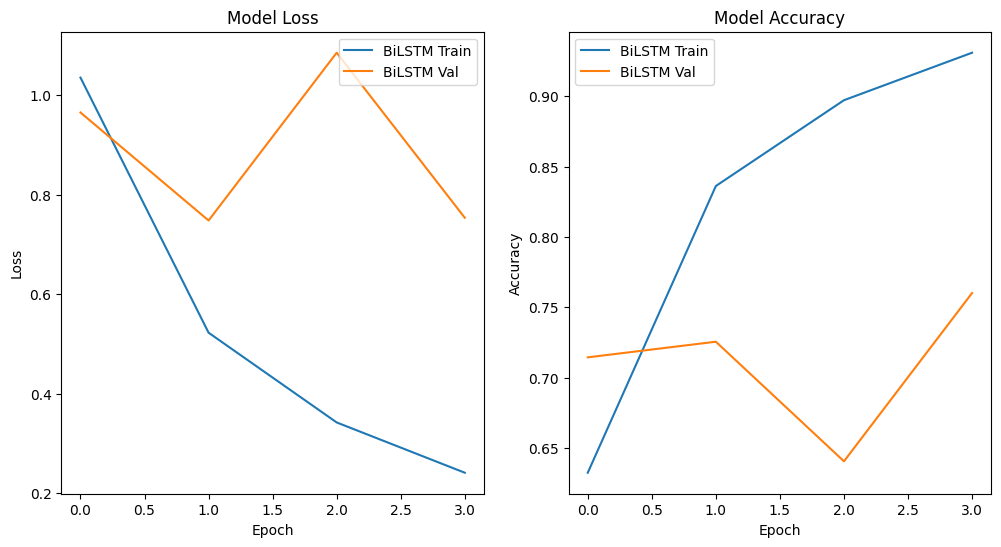

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['BiLSTM Train', 'BiLSTM Val'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['BiLSTM Train', 'BiLSTM Val'], loc='upper left')

plt.show()

## EXPERIMENT 2
Epoch=3 Batch size=70 Dropout=0.1 Patience=2

In [40]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l2

# Define the BiLSTM model with additional dropout layers and batch normalization
model2_bilstm = Sequential()
model2_bilstm.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model2_bilstm.add(Bidirectional(LSTM(128, return_sequences=True)))
model2_bilstm.add(BatchNormalization())
model2_bilstm.add(Dropout(0.1))
model2_bilstm.add(Bidirectional(LSTM(64)))
model2_bilstm.add(BatchNormalization())
model2_bilstm.add(Dropout(0.1))
model2_bilstm.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.02)))
model2_bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with reduced patience for early stopping
checkpoint_bilstm = ModelCheckpoint('model2_bilstm.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=2, verbose=1)

# Train the model
history_bilstm = model2_bilstm.fit(X_train, y_train, epochs=3, batch_size=70, validation_data=(X_val, y_val), callbacks=[checkpoint_bilstm, early_stopping_bilstm])


Epoch 1/3
134/134 [==============================] - ETA: 0s - loss: 0.8396 - accuracy: 0.6996
Epoch 1: val_loss improved from inf to 1.08171, saving model to model2_bilstm.h5
134/134 [==============================] - 20s 97ms/step - loss: 0.8396 - accuracy: 0.6996 - val_loss: 1.0817 - val_accuracy: 0.6684
Epoch 2/3
134/134 [==============================] - ETA: 0s - loss: 0.4317 - accuracy: 0.8668
Epoch 2: val_loss improved from 1.08171 to 1.04634, saving model to model2_bilstm.h5
134/134 [==============================] - 7s 50ms/step - loss: 0.4317 - accuracy: 0.8668 - val_loss: 1.0463 - val_accuracy: 0.5134
Epoch 3/3
134/134 [==============================] - ETA: 0s - loss: 0.2618 - accuracy: 0.9268
Epoch 3: val_loss improved from 1.04634 to 0.65890, saving model to model2_bilstm.h5
134/134 [==============================] - 5s 36ms/step - loss: 0.2618 - accuracy: 0.9268 - val_loss: 0.6589 - val_accuracy: 0.7307


In [41]:
# Evaluate BiLSTM model on the test set
model2_bilstm.load_weights('model2_bilstm.h5')
test_loss_bilstm, test_accuracy_bilstm = model2_bilstm.evaluate(X_test, y_test)
print(f"\nBiLSTM Test Loss: {test_loss_bilstm}")
print(f"BiLSTM Test Accuracy: {test_accuracy_bilstm}")

92/92 [==============================] - 1s 10ms/step - loss: 0.6342 - accuracy: 0.7456

BiLSTM Test Loss: 0.6341795921325684
BiLSTM Test Accuracy: 0.7455601096153259


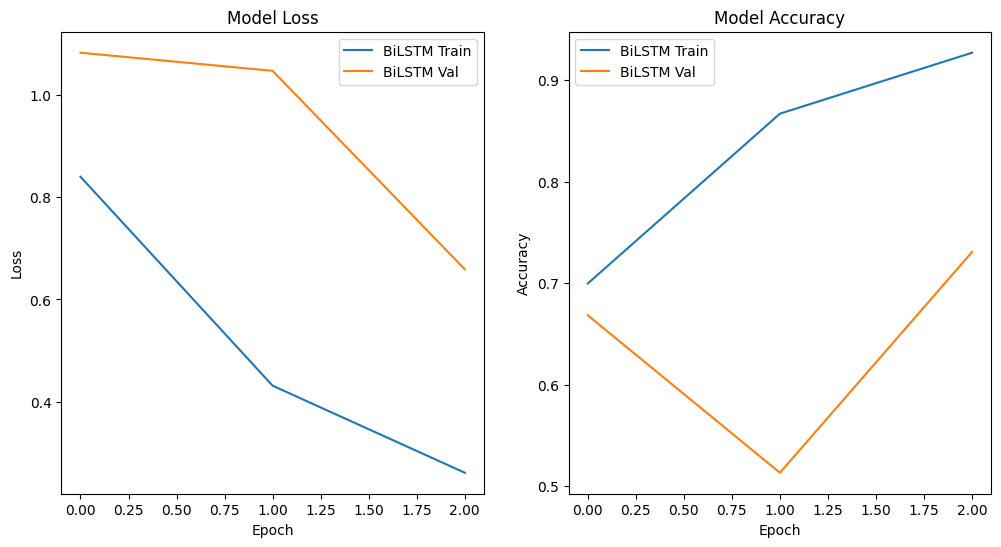

In [42]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['BiLSTM Train', 'BiLSTM Val'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['BiLSTM Train', 'BiLSTM Val'], loc='upper left')

plt.show()

# Experiment 3
Epoch=6 Batch size=64 Dropout=0.01 Patience=10

In [33]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, BatchNormalization, Bidirectional
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam
from keras.regularizers import l2

# Define the BiLSTM model with additional dropout layers and batch normalization
model3_bilstm = Sequential()
model3_bilstm.add(Embedding(input_dim=10000, output_dim=128, input_length=100))
model3_bilstm.add(Bidirectional(LSTM(128, return_sequences=True)))
model3_bilstm.add(BatchNormalization())
model3_bilstm.add(Dropout(0.01))
model3_bilstm.add(Bidirectional(LSTM(64)))
model3_bilstm.add(BatchNormalization())
model3_bilstm.add(Dropout(0.01))
model3_bilstm.add(Dense(3, activation='softmax', kernel_regularizer=l2(0.02)))

model3_bilstm.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with reduced patience for early stopping
checkpoint_bilstm = ModelCheckpoint('model3_bilstm.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)
early_stopping_bilstm = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

# Train the model
history_bilstm = model3_bilstm.fit(X_train, y_train, epochs=6, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint_bilstm, early_stopping_bilstm])


Epoch 1/6
147/147 [==============================] - ETA: 0s - loss: 0.8047 - accuracy: 0.7086
Epoch 1: val_loss improved from inf to 1.02989, saving model to model3_bilstm.h5
147/147 [==============================] - 22s 94ms/step - loss: 0.8047 - accuracy: 0.7086 - val_loss: 1.0299 - val_accuracy: 0.6504
Epoch 2/6
147/147 [==============================] - ETA: 0s - loss: 0.4129 - accuracy: 0.8699
Epoch 2: val_loss improved from 1.02989 to 0.83697, saving model to model3_bilstm.h5
147/147 [==============================] - 6s 41ms/step - loss: 0.4129 - accuracy: 0.8699 - val_loss: 0.8370 - val_accuracy: 0.7029
Epoch 3/6
147/147 [==============================] - ETA: 0s - loss: 0.2574 - accuracy: 0.9254
Epoch 3: val_loss improved from 0.83697 to 0.61913, saving model to model3_bilstm.h5
147/147 [==============================] - 6s 40ms/step - loss: 0.2574 - accuracy: 0.9254 - val_loss: 0.6191 - val_accuracy: 0.7661
Epoch 4/6
147/147 [==============================] - ETA: 0s - loss

In [34]:
# Evaluate BiLSTM model on the test set
model3_bilstm.load_weights('best_model_bilstm.h5')
test_loss_bilstm, test_accuracy_bilstm = model3_bilstm.evaluate(X_test, y_test)
print(f"\nBiLSTM Test Loss: {test_loss_bilstm}")
print(f"BiLSTM Test Accuracy: {test_accuracy_bilstm}")

92/92 [==============================] - 1s 10ms/step - loss: 0.5762 - accuracy: 0.7828

BiLSTM Test Loss: 0.5762159824371338
BiLSTM Test Accuracy: 0.7827869057655334


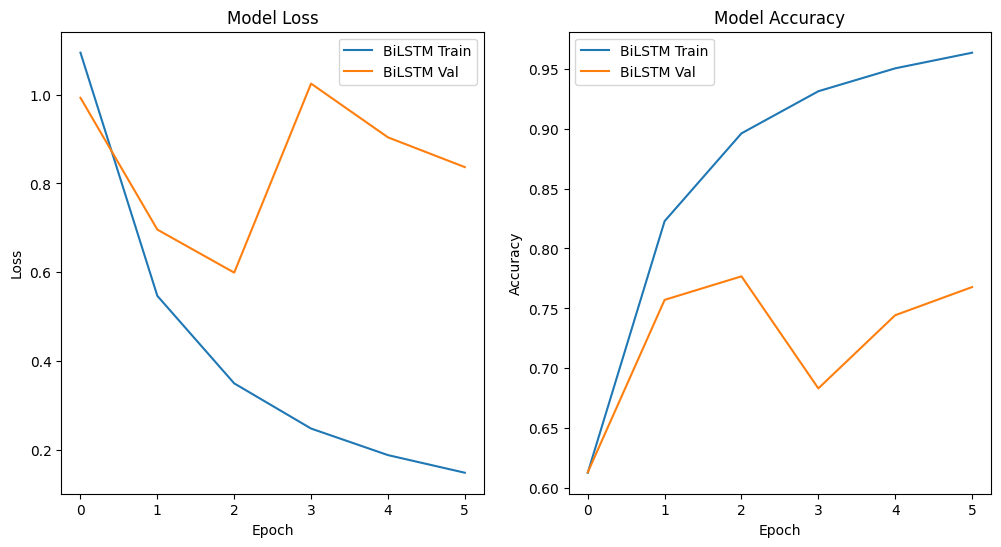

In [15]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_bilstm.history['loss'])
plt.plot(history_bilstm.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['BiLSTM Train', 'BiLSTM Val'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history_bilstm.history['accuracy'])
plt.plot(history_bilstm.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['BiLSTM Train', 'BiLSTM Val'], loc='upper left')

plt.show()

92/92 [==============================] - 6s 13ms/step


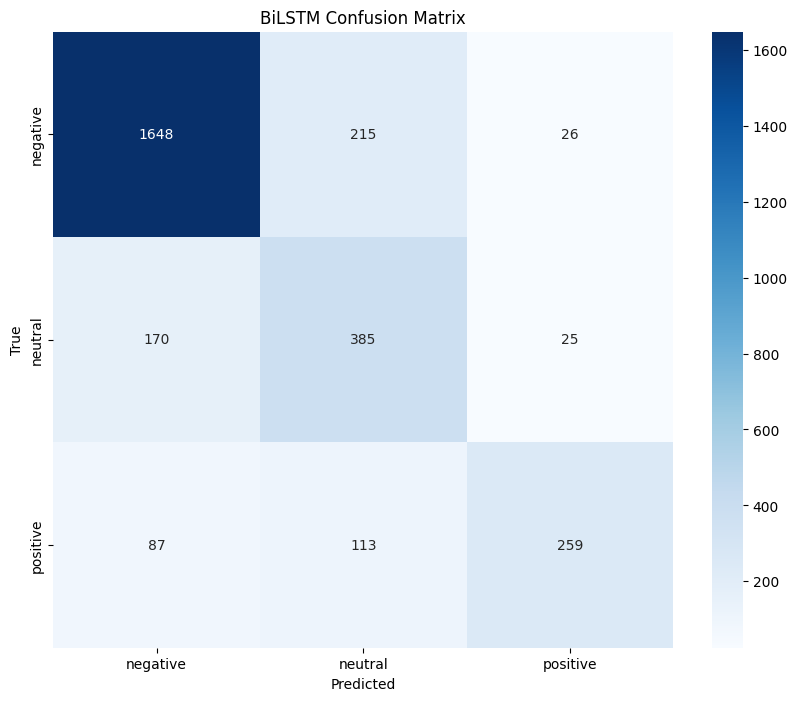


BiLSTM Classification Report:
              precision    recall  f1-score   support

    negative       0.87      0.87      0.87      1889
     neutral       0.54      0.66      0.60       580
    positive       0.84      0.56      0.67       459

    accuracy                           0.78      2928
   macro avg       0.75      0.70      0.71      2928
weighted avg       0.80      0.78      0.78      2928



In [43]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import numpy as np
# Confusion matrix for BiLSTM
y_pred_bilstm = np.argmax(model3_bilstm.predict(X_test), axis=1)
conf_matrix_bilstm = confusion_matrix(y_test, y_pred_bilstm)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_bilstm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('BiLSTM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

print("\nBiLSTM Classification Report:")
print(classification_report(y_test, y_pred_bilstm, target_names=le.classes_))

# QUESTION 4
Provide the details related to your improved LSTM architecture that returns the best accuracy.

Embedding Layer Input Dimension: 10,000 Output Dimension: 128
Input Length: 100
First Bidirectional LSTM Layer: Units: 128
Return Sequences: True
Batch Normalization: Normalizes the outputs of the first BiLSTM layer
Dropout Layer: Dropout Rate: 0.01





Second Bidirectional LSTM Layer: Units: 64
Batch Normalization: Normalizes the outputs of the second BiLSTM layer
Dropout Layer: Dropout Rate: 0.01
Dense Layer: Units: 3
Activation: softmax
Kernel Regularizer: L2 regularization with a factor of 0.02

# QUESTION 5
Analyze the graphs and results obatined during the training, validation, and test steps.

train loss: *0.10* train accuracy: 0.97 val_loss: 0.89 val_accuracy: 0.77 Test Loss: 0.57 Test Accuracy: 0.78

# QUESTION 6

Compare the performance of the LSTM model and the improved LSTM model applied to the same dataset.

The validation loss trend and the test results indicate that the BiLSTM model generalizes better to unseen data compared to the LSTM model. This suggests that the bidirectional nature of BiLSTM, which allows it to consider both past and future context, provides an advantage in modeling the dataset used in this analysis.

# QUESTION 7
Discuss the strengths and limitations of using recurrent neural models for sentiment analysis.

Pros: Recurrent Neural Networks (RNNs) excel in handling sequential data, making them ideal for sentiment analysis by capturing the context and order of words in a sentence. They can remember previous inputs within a sequence, allowing them to understand complex sentence structures and language nuances like sarcasm or negations.RNNs can process input sequences of varying lengths, providing flexibility in handling different sentence sizes.

Cons:
 RNNs face significant challenges such as vanishing and exploding gradient problems, which hinder their ability to learn long-term dependencies. Training RNNs is also computationally intensive and slow,  with large datasets or long sequences. standard RNNs have limited memory for long-term dependencies and their architectural complexity requires careful design and tuning. These issues often lead to degraded performance with very long texts.

